In [ ]:
# 머신러닝
- EDA
- 가공
- 여러 모델 테스트
    - 하이퍼 파라미터 세팅
    - 생성 => 훈련 => 검증, 예측

In [ ]:
train(훈련, 정답:target)

test(예측, 시험문제:target 데이터)

In [ ]:
https://cafe.naver.com/jkitstudy/699

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 메타문자
# \ + 정해진 알파벳 => 특별한 효과
# r => raw
print(r'python\tpython')

python\tpython


In [7]:
train_df = pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\2025 수업\DA양성과정 ML\train.csv')
test_df = pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\2025 수업\DA양성과정 ML\test.csv')

# EDA
- 데이터를 다양한 방식으로 살펴보자!

In [9]:
# target => 카테고리 => 분류모델
# feature => 카테고리 : pclass, sex, embarked => 인코딩
#         => 연속된숫자 : age, fare, family => 스케일링
#         => 데이터가 아닌것 : name, ticket, cabin => 데이터 추출

# 헷갈리는 feature => a, b => a b 사이에 새로운 값이 들어갈 수 있나
#                          => a b 차이가 의미가 있나

In [14]:
# 데이터가 양품인가?
# pd에서는 결측값을 NaN
# 집계!
train_df.isna().sum() / len(train_df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [15]:
test_df.isna().sum() / len(test_df) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

# 결측 데이터 처리
## Embarked

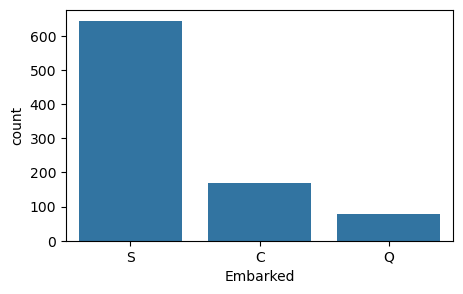

In [18]:
plt.figure(figsize=(5, 3))
sns.countplot(data=train_df, x='Embarked')
plt.show()

In [19]:
train_df[ train_df['Embarked'].isna() ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


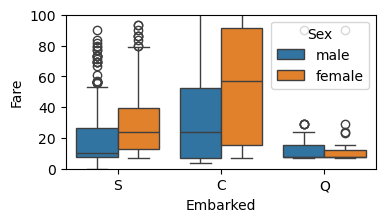

In [23]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=train_df, x='Embarked', y='Fare', hue='Sex')
plt.ylim( [0, 100]  )
plt.show()

In [29]:
# .loc[인덱스, 컬럼] => .loc[인덱스를 찾아오는 조건, 컬럼]
train_df.loc[  train_df['Embarked'].isna(), 'Embarked'] = 'C'

## Age

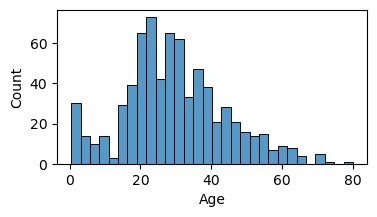

In [30]:
plt.figure(figsize=(4, 2))
sns.histplot(data=train_df, x='Age', bins=30)
plt.show()

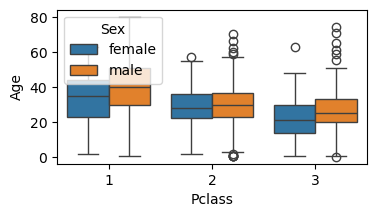

In [34]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=train_df, x='Pclass', y='Age', hue='Sex')
plt.show()

In [42]:
temp = train_df.groupby( ['Pclass', 'Sex'] )['Age'].mean()

for val in temp.index:
    cond1 = train_df['Sex'] == val[1]
    cond2 = train_df['Pclass'] == val[0]
    cond3 = train_df['Age'].isna()
    train_df.loc[ cond1 & cond2 & cond3, 'Age' ] = temp[val]

    cond1 = test_df['Sex'] == val[1]
    cond2 = test_df['Pclass'] == val[0]
    cond3 = test_df['Age'].isna()
    test_df.loc[ cond1 & cond2 & cond3, 'Age' ] = temp[val]

## Fare

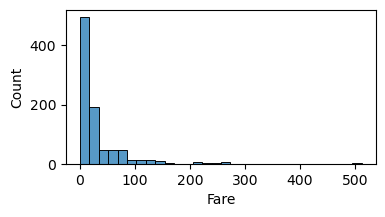

In [43]:
plt.figure(figsize=(4, 2))
sns.histplot(data=train_df, x='Fare', bins=30)
plt.show()

In [44]:
test_df[ test_df['Fare'].isna() ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


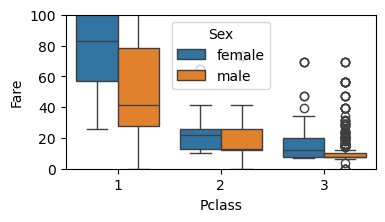

In [46]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=train_df, x='Pclass', y='Fare', hue='Sex')
plt.ylim([0, 100])
plt.show()

In [49]:
train_df.groupby( ['Pclass', 'Sex'] )['Fare'].median()

test_df.loc[ test_df['Fare'].isna(), 'Fare' ] = 7.925

# Feature Engineering
- 데이터가 아닌 것에서 데이터를 추출
    - Name, Ticket, Cabin
- 스케일링
    - Age, Fare, Family
- 인코딩
    - Pclass, Sex, Embarked

## Name
- 하면 할 수 있는데 겹치는 정보...

In [59]:
'Braund, Mr. Owen Harris'.split(', ')[1].split('.')[0]

'Mr'

In [63]:
def temp(x):
    return x.split(', ')[1].split('.')[0]

train_df['Name2'] = train_df['Name'].apply( temp )

In [65]:
train_df['Name2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [ ]:
# feature가 많은면 문제가 생김 => 차원의 저주

## Ticket, Cabin
- 할게 없음...

In [66]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

## 스케일링
- 숫자 데이터의 단위를 맞쳐줌
- standard 스케일링이 대표적
    - 평균으로 빼서 편차로 나누어 줌 => N(0, 1)
- min-max 스케일링 => 0, 1 사이로 매핑해 줌

In [78]:
from sklearn.preprocessing import StandardScaler
# skew되어 있는 Fare를 로그변환
train_df['Fare_log'] = np.log1p( train_df['Fare']  )
test_df['Fare_log'] = np.log1p( test_df['Fare'] )
# 1. 스케일러 생성
sc = StandardScaler()
# 2. 스케일러 훈련(fit)
sc.fit( train_df[ ['Age', 'Fare_log'] ] )
# 3. 변형(transform)
train_df[ ['Age_s', 'Fare_s'] ] = sc.transform( train_df[ ['Age', 'Fare_log'] ] )
test_df[ ['Age_s', 'Fare_s'] ] = sc.transform( test_df[ ['Age', 'Fare_log'] ] )

In [ ]:
EDA
결측 데이터 처리
Feature engineering
    - 데이터가 아닌 것을 데이터로 추출
    - Feature Selection
    - Scailing => standard 스케일링
    - Encoding

## 인코딩
- 원핫인코딩 => 0, 1로 바꿔줌
- Pclass, Sex, Embarked

In [79]:
from sklearn.preprocessing import OneHotEncoder

In [89]:
onehot = OneHotEncoder(sparse_output=False, drop='first')
onehot.fit( train_df[['Pclass', 'Sex', 'Embarked']] )
train_df[ onehot.get_feature_names_out() ] = onehot.transform( train_df[['Pclass', 'Sex', 'Embarked']] )
test_df[ onehot.get_feature_names_out() ] = onehot.transform( test_df[['Pclass', 'Sex', 'Embarked']] )

# 데이터 정리

In [97]:
train_df.columns

features = ['Age_s', 'Fare_s', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q',
            'Embarked_S']
X = train_df[features]
y = train_df['Survived']
test_X = test_df[features]

In [98]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split( X, y, 
                                                      test_size=0.3, 
                                                      random_state=13, 
                                                      stratify=y )

# KNN 모델

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [104]:
# 0. 교차검증을 통해서 하이퍼 파라미터 K를 찾아보자

score_list = []
for k in range(1, 51):
    score = cross_val_score( KNeighborsClassifier(k), train_x, train_y, cv=5 ).mean()
    score_list.append(score)

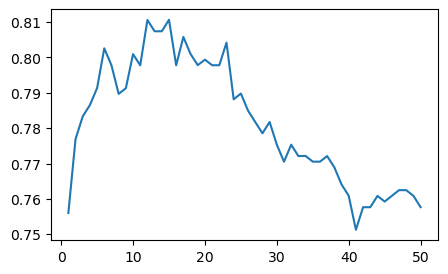

In [105]:
plt.figure(figsize=(5, 3))
plt.plot( range(1, 51), score_list )
plt.show()

In [107]:
# 1. 모델 생성
knn = KNeighborsClassifier(13)
# 2. 훈련
knn.fit(train_x, train_y)
# 3. 검증, 예측
knn.score(valid_x, valid_y)

0.7723880597014925

In [115]:
# 예측해서 제출
submit_knn = test_df[['PassengerId']].copy()
submit_knn['Survived'] = knn.predict(test_X)
submit_knn.to_csv( r'C:\Users\USER\OneDrive\Desktop\2025 수업\DA양성과정 ML\knn_result.csv',
                  index=False )

# Tree 모델
- gini 계수 => 데이터 순수성
- 데이터가 가장 순수해지는 feature를 이용을해서 계속 2개로 분류해 나감
- 예측력 소소...
- 해석력은 좋음, 중요한 feature를 고를 수 있게 해줌
- 오버피팅 => 따로 멈추지 않으면 끝까지 들어가서 오버피팅이 됨

In [141]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

In [120]:
   params = { 
            'max_depth': [1, 5, 10, 15, 25],
            'min_samples_leaf':[1, 5, 10, 15]
        }

grid_tree = GridSearchCV( DecisionTreeClassifier(),  params, cv=5)
grid_tree.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10, 15],
                         'min_samples_leaf': [1, 5, 10, 15]})

In [133]:
test = pd.DataFrame( grid_tree.cv_results_['params'] )
test['score'] = grid_tree.cv_results_['mean_test_score']
pd.pivot_table( test, index='max_depth', columns='min_samples_leaf' )

score                              
min_samples_leaf        1         5         10        15
max_depth                                               
3.0               0.800955  0.804155  0.802594  0.783329
5.0               0.802594  0.797755  0.789716  0.770516
10.0              0.786477  0.791277  0.781729  0.768903
15.0              0.759226  0.792890  0.784929  0.768903

In [134]:
grid_tree.score( valid_x, valid_y )

0.8283582089552238

In [ ]:
# 예측해서 제출
submit_tree = test_df[['PassengerId']].copy()
submit_tree['Survived'] = grid_tree.predict( test_X )
submit_tree.to_csv( r'C:\Users\USER\OneDrive\Desktop\2025 수업\tree_result.csv',
                  index=False )

In [139]:
grid_tree.best_estimator_.feature_importances_

array([0.10478338, 0.11955114, 0.        , 0.15569741, 0.61996807,
       0.        , 0.        ])

In [140]:
grid_tree.best_estimator_.feature_names_in_

array(['Age_s', 'Fare_s', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S'], dtype=object)

In [ ]:
plt.figure(dpi=400)
plot_tree(grid_tree.best_estimator_, 
          feature_names=grid_tree.best_estimator_.feature_names_in_)
plt.show()

# Random Forest
- 약한 트리 모델 100개 만들어서 합쳐보자...
- 다양성
    - feature를 랜덤하게 선택...
    - 각 나무마다 훈련하는 데이터도 다시 샘플링하여 다르게 함

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
params = {'max_depth':[5, 10, 15, 20],
          'min_samples_leaf':[1, 5, 10, 15]}
grid_rf = GridSearchCV( RandomForestClassifier(), params, cv=5 )
grid_rf.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 5, 10, 15]})

In [149]:
test = pd.DataFrame( grid_rf.cv_results_['params'] )
test['score'] = grid_rf.cv_results_['mean_test_score']
pd.pivot_table( test, index='max_depth', columns='min_samples_leaf' )

score                              
min_samples_leaf        1         5         10        15
max_depth                                               
5                 0.813794  0.800994  0.796142  0.788181
10                0.801019  0.800981  0.797768  0.791368
15                0.794555  0.792994  0.792929  0.792968
20                0.786516  0.799406  0.804181  0.789729

In [150]:
grid_rf.best_estimator_.feature_importances_

array([0.17126921, 0.25161462, 0.02310145, 0.13066366, 0.38409835,
       0.01398012, 0.02527259])

In [151]:
grid_rf.best_estimator_.feature_names_in_

array(['Age_s', 'Fare_s', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S'], dtype=object)

# SVM
- 해석력 나쁨, 성능 소소
- 수학적 => 공부하긴 좋음...
- C => 경계선 부근 얼마 오차를 허용할 것이냐
- rbg 커널 => gamma : 경계선 부근의 데이터에 얼마나 웨이트를 줄것이냐

In [152]:
from sklearn.svm import SVC

In [154]:
params = {'C':[0.1, 0.5, 1, 5],
         'gamma':[0.1, 0.5, 1, 5]}
grid_svc = GridSearchCV(SVC(), params, cv=5)
grid_svc.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5], 'gamma': [0.1, 0.5, 1, 5]})

In [156]:
test = pd.DataFrame( grid_svc.cv_results_['params'] )
test['score'] = grid_svc.cv_results_['mean_test_score']
pd.pivot_table( test, index='C', columns='gamma' )

score                              
gamma       0.1       0.5       1.0       5.0
C                                            
0.1    0.765665  0.775316  0.775316  0.616387
0.5    0.786581  0.802568  0.799406  0.786568
1.0    0.781755  0.804219  0.792994  0.783368
5.0    0.804219  0.788181  0.786594  0.783303

In [158]:
grid_svc.score(valid_x, valid_y)

0.8283582089552238

In [159]:
grid_svc.predict(test_X)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,